<a href="https://colab.research.google.com/github/sokhan1/PYTHON/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import torch

## STEP 1. Data Collection(Generation)

In [69]:
#case1

N=20 # The number of data is 20
random0=torch.randn(int(N/2),1)
random5=torch.randn(int(N/2),1)+5
class1_data=torch.hstack([random0, random5])
class2_data=torch.hstack([random5, random0])
class1_label=torch.ones(int(N/2),1) # Label is needed
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

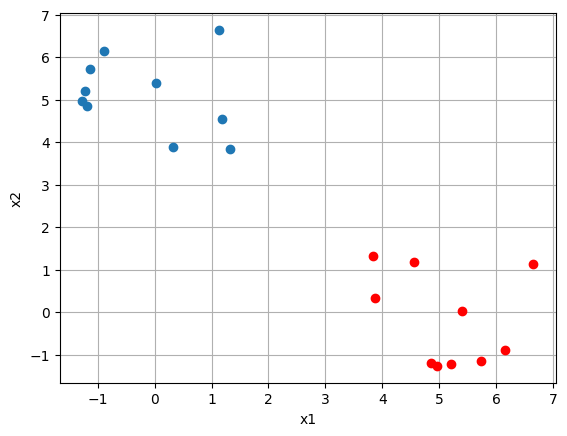

In [70]:
import matplotlib.pyplot as plt #data visualization
plt.plot(class1_data[:,0], class1_data[:,1],'o')
plt.plot(class2_data[:,0], class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

## STEP2 Model Making

In [71]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.testmodel = nn.Sequential(nn.Linear(2,10000),
                                       nn.Sigmoid(),
                                       nn.Linear(10000,1), # This is binary classification that's why output node is 1
                                       nn.Sigmoid())
    def forward(self,x):
        x=self.testmodel(x)
        return x

In [72]:
testmodel = MLP()
print(testmodel)
print(testmodel(torch.randn(5,2)).shape)

MLP(
  (testmodel): Sequential(
    (0): Linear(in_features=2, out_features=10000, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=10000, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
torch.Size([5, 1])


## STEP 3 Training a model

In [73]:
from torch import optim
import torch.nn.functional as F

LR = 1e-1 #Learning Rate=LR
EPOCH = 100

optimizer = optim.SGD(testmodel.parameters(),lr=LR) # optim needs weight(parameter) and Learning Rate

loss_graph =[] #loss_graph is list
testmodel.train() #change to train mode
for ep in range(EPOCH):
    y_hat=testmodel(X)
    #Loss (Binary Cross Entropy Loss), this nees output(q) and label(y)
    loss= F.binary_cross_entropy(y_hat,y) # y_hat=q

    optimizer.zero_grad() #Clear accumulation by optimizer
    loss.backward() # Require_grad=True, This make Gradient, Backpropagation
    optimizer.step() #update,

    loss_graph += [loss.item()]
    print(f"Epoch:{ep+1}, train loss : {round(loss.item(),3)}")
    print("--"*20)

Epoch:1, train loss : 0.747
----------------------------------------
Epoch:2, train loss : 28.743
----------------------------------------
Epoch:3, train loss : 0.009
----------------------------------------
Epoch:4, train loss : 0.001
----------------------------------------
Epoch:5, train loss : 0.0
----------------------------------------
Epoch:6, train loss : 0.0
----------------------------------------
Epoch:7, train loss : 0.0
----------------------------------------
Epoch:8, train loss : 0.0
----------------------------------------
Epoch:9, train loss : 0.0
----------------------------------------
Epoch:10, train loss : 0.0
----------------------------------------
Epoch:11, train loss : 0.0
----------------------------------------
Epoch:12, train loss : 0.0
----------------------------------------
Epoch:13, train loss : 0.0
----------------------------------------
Epoch:14, train loss : 0.0
----------------------------------------
Epoch:15, train loss : 0.0
---------------------

In [74]:
x=torch.tensor([1.],requires_grad=True) # the data type must be float
for _ in range(2):
    loss=x**2
    loss.backward() #This line includes differentiation
    print(x.grad) # Gradient is accumulation
    x.grad= None # Remove Accumulation


tensor([2.])
tensor([2.])


In [75]:
print(F.binary_cross_entropy(y_hat,y))
print(-torch.sum(torch.log(y_hat**y*(1-y_hat)**(1-y))/N)) #binary_cross_entropy is mean value

tensor(2.8180e-05, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(2.8180e-05, grad_fn=<NegBackward0>)


Text(0, 0.5, 'loss')

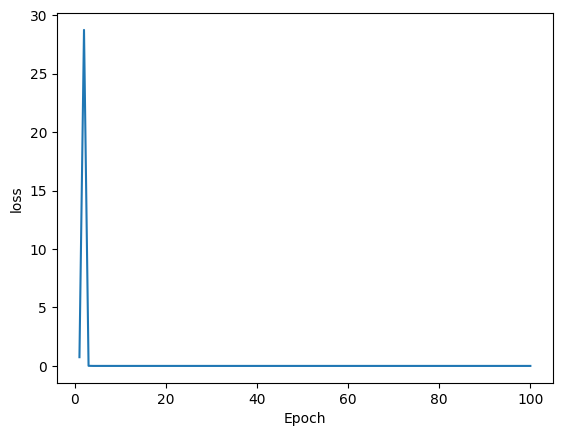

In [76]:
plt.plot(range(1,EPOCH+1),loss_graph)
plt.xlabel('Epoch')
plt.ylabel('loss')

## STEP4.Model test

Text(0.5, 0.5, 'x2')

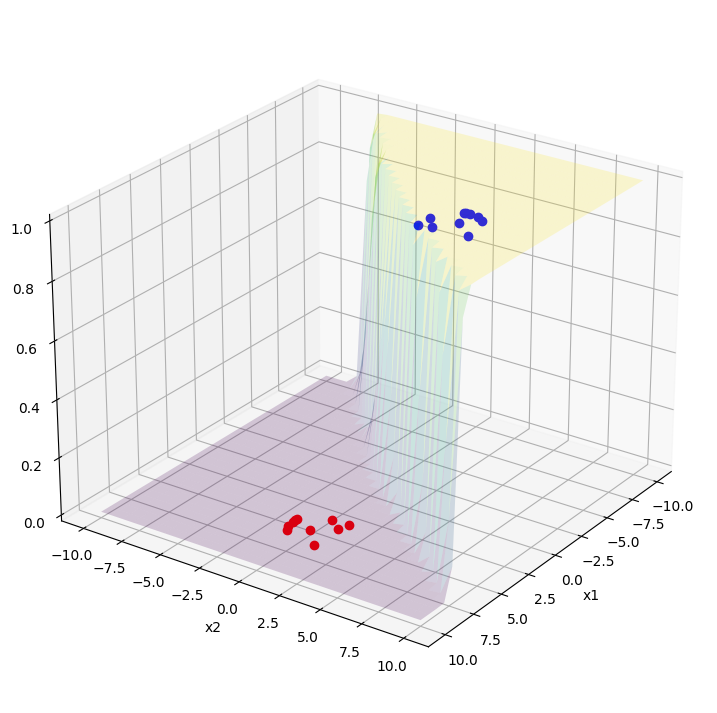

In [77]:
x1_test=torch.linspace(-10,10,30)
x2_test=torch.linspace(-10,10,30)
X1_test, X2_test=torch.meshgrid(x1_test,x2_test)
X_test=torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)
X_test.shape

y_result=testmodel(X_test)
y_hat.shape

#Test not Training, eval is needed, for example DROP OUT
testmodel.eval()  # In case of Drop Out, Test model and Training model are different that's why We need to use evaluation
with torch.no_grad(): #Remove Grad, Because this is test
    y=testmodel(X_test)
    Y=y.squeeze() # Remove dimension

plt.figure(figsize=[10,9]) # Graph of training datas
ax = plt.axes(projection="3d")
ax.view_init(elev=25, azim=35) # direction of angle
ax.plot_surface(X1_test, X2_test, Y.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0], class1_data[:,1], class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0], class2_data[:,1], class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")

In [78]:
import plotly.graph_objects as go #In this code, I can interact with graph

fig=go.Figure(data=[go.Surface(x=X1_test, y=X2_test, z=Y, colorscale="viridis",opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen",project_z=True))
fig.update_layout(title='binary classification',width=700,height=600)